<center><h1>Heavy Traffic Indicators on I-94</h1></center>

![image](i94.png)


# Table of Contents
1. [**Introduction**](#1)
* [Data Description](#1.1)
2. [**Data Exploration**](#2)
3. [**Data Analysis**](#3)
* [Traffic Volume](#3.1)
* [Time Indicators](#3.2)
* [Weather Indicators](#3.3)
5. [**Conclusion**](#4)

<a id="1"></a>
# Introduction
[I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94) is an east-west Interstate highway connecting the Great Lakes and northern Great regions of the United States. It lies along the primary overland route from Seattle to Toronto.
In this project, we're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway. 

**Project Goal:**     
The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.
<a id="1.1"></a>
## Data Description
John Hogue made the dataset available, and can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).
The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. The station only records westbound traffic (cars moving from east to west). 
Hence our results are limited to the `westbound traffic`.

<a id="2"></a>
# Data Exploration

In [1]:
import pandas as pd
i_94 = pd.read_csv("./Metro_Interstate_Traffic_Volume.csv")
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has `48,204` rows and `9` columns, and there are no null values. Each row describes traffic and weather data for a specific hour - we have data from `2012-10-02 09:00:00` until `2018-09-30 23:00:00`.

<a id="3"></a>
# Data Analysis
<a id="3.1"></a>
## Traffic Volume
We'll start our analysis by examining the distribution of the `traffic volume` column.

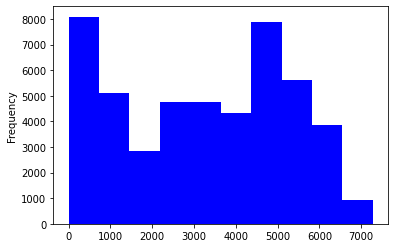

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
i_94['traffic_volume'].plot.hist(color='b')
plt.show()

In [5]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

**Insights**    
* Between `2012-10-02 09:00:00` and `2018-09-30 23:00:00`, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars. 
* About 25% of the time, there were `1,193` cars or fewer passing the station each hour - this probably occurs during the night, or when the road is under construction.
* About 75% of the time, the traffic volume was `4,933` cars or fewer. The remaining 25% of the time, the traffic volume exceeded 4,933 cars. 

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data. 

We'll start by dividing the dataset into two parts:
* Daytime data: hours from 7a.m to 7p.m (12 hours)
* Nighttime data: hours from 7p.m to 7a.m (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [6]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) &
                  (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) |
                    (i_94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


### Day vs Night
Let's compare the traffic volume at night and during the day

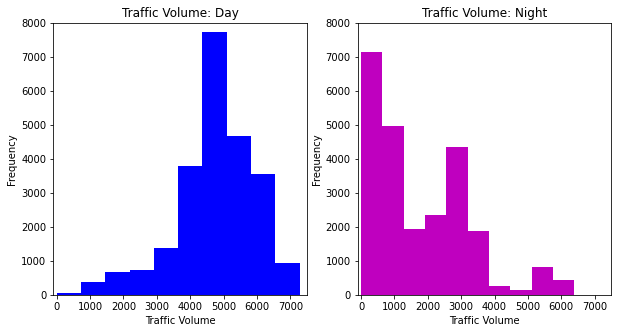

In [7]:
plt.figure(figsize=(10, 5))

# Day plt
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'], color='b')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

# Night plot
plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'], color='m')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [8]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

**Insights**    
* The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high - there are `4,252` or more cars passing the station each hour 75% of the time.
* The histogram displaying the nighttime data is right skewed. This means that most of the traffic values are low - 75% of the time, the number of cars that passed the station each hour was less than `2,819`.

Although there are still measurements of over `5,000` cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on daytime data moving forward. 

<a id="3.2"></a>
## Time Indicators
### Month
One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day. 

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
* Month
* Day of the week
* Time of day


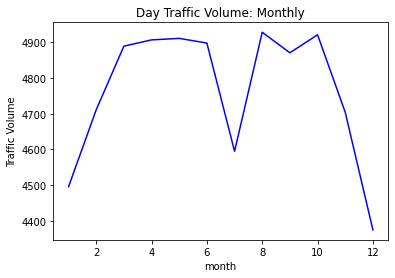

In [10]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line(color='b')
plt.ylabel('Traffic Volume')
plt.title('Day Traffic Volume: Monthly')
plt.show()

**Insights**      
* The traffic looks less heavy during the cold months (`November-February`) and more intense during the warm months (`March-October`), with one interesting exception, July.

Is there anything special about July? Is traffic significantly less heavy in July each year?     
Let's see how the traffic volume changed each year in July.

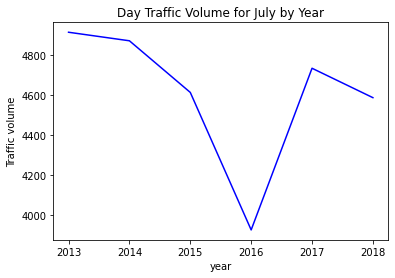

In [11]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line(color='b')
plt.ylabel('Traffic volume')
plt.title('Day Traffic Volume for July by Year')
plt.show()

Typically, the traffic is pretty heavy in July, similar to the warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road constriction - [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can expect for each hour of daytime traffic a traffic volume close to `5,000` cars. 

### Day of Week
Let's now look at a more granular indicator: day of week. 

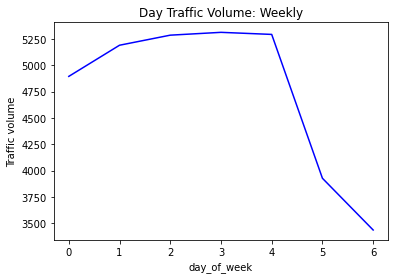

In [12]:
day['day_of_week'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('day_of_week').mean()
by_dayofweek['traffic_volume'].plot.line(color='b')
plt.ylabel('Traffic volume')
plt.title('Day Traffic Volume: Weekly')
plt.show()

**Insights**    
* Traffic volume is significantly heavier on business days (`Monday-Friday`). Except for Monday, we only see values over `5,000` during business days. 
* Traffic is lighter on `weekends`, with values below `4,000` cars. 

### Time of Day
We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately.        
Let's start by splitting the data based on the day type: business day or weekend:

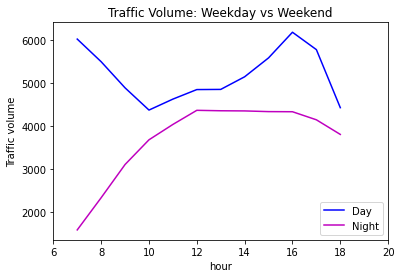

In [13]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['day_of_week'] <= 4] # 4 == Friday
weekend = day.copy()[day['day_of_week'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

by_hour_business['traffic_volume'].plot.line(color='b', label='Day')
by_hour_weekend['traffic_volume'].plot.line(color='m', label='Night')
plt.xlim(6,20)
plt.ylabel('Traffic volume')
plt.title('Traffic Volume: Weekday vs Weekend')
plt.legend()


plt.show()

**Insights**     
* At each hour of the day, the traffic volume is generally higher during business days compared to weekends.
* As somehow expected, the rush hours are around 7a.m and 4p.m - when most people travel from home to work and back. We see volumes of `6,000` cars at rush hours. 

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:
* The traffic is usually heavier during the warm months(`March-October`), compared to cold months (`November-February`).
* The traffic is usually heavier on `business days` compared to weekends.
* On business days, the rush hours are around `7a.m` and `4p.m`.

<a id="3.3"></a>
## Weather Indicators
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful colums about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`. 

A few of these columns are numerical, so let's start by looking up their correlation values with `traffic_volume`.

In [14]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
day_of_week      -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

`temp` shows the strongest correlation with a value of just +0.13. The other relevant columns don't show any strong correlation with `traffic_volume`.                     
Let's generate a scatter plot to visualize the correlation between `temp` and `traffic_volume`.

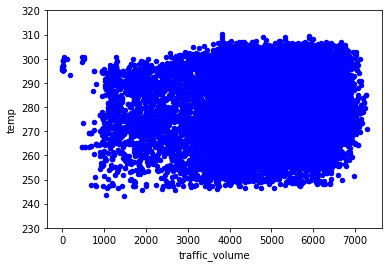

In [15]:
day.plot.scatter('traffic_volume', 'temp', color='b')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

From the plot above, temperature doesn't look like a solid indicator of heavy traffic.         
Let's now look at other weather-related columns: `weather_main` and `weather_description`.


### Weather Types
To start, we're going to group the data by `weather_main` and look at the `traffic_volume` averages.

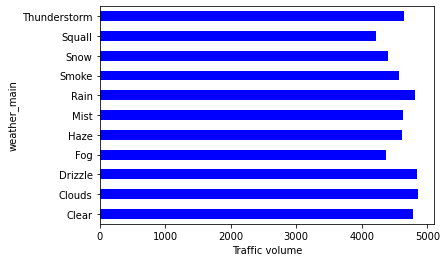

In [16]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh(color='b')
plt.xlabel('Traffic volume')
plt.show()


It looks like there's no weather type where traffic volume exceeds `5,000` cars. This makes finding a heavy traffic indicator more difficult. Let's also group by `weather_description` which has a more granular weather classification. 

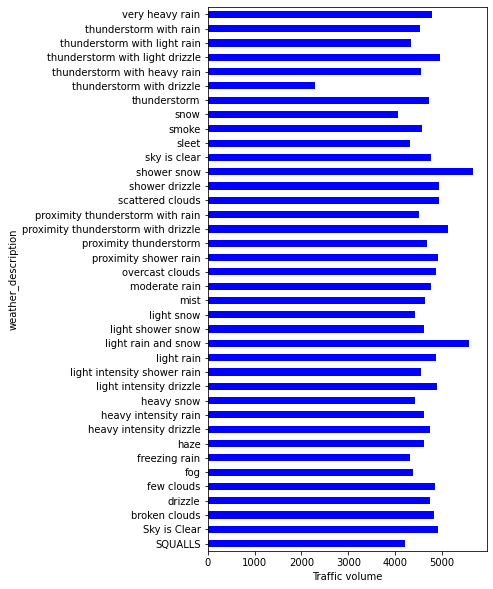

In [17]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10), color='b')
plt.xlabel('Traffic volume')
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000: 
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values - this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking. 

<a id="4"></a>
# Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators: 
1. Time Indicators
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to the weekends.
* On business days, the rush hours are around 7 and 16.
2. Weather Indicators
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle
